# [krx]데이터 자동 수집을 위한 가이드
이번에는 주식 데이터를 자동 수집을 해보자. 이번은 간단하게 crontab를 사용해 매일 17시에 실행을 하여 주식 데이터를 수집 할 것이다. 지금은 한가지 주식을 해보지만 다음에는 여러가지의 주식 정보를 수집하는 방법을 블로깅 해보겠다.<br>목차는 다음과 같다.
- 주피터 파일 생성 후 데이터 수집 코드 생성
- 주피터 파일 파이썬 파일로 변경
- crontab을 이용해 월~금 5시 주식 데이터 수집

## 1. 코드 작성

## 1-1 라이브러리 불러오기

In [15]:
import pandas as pd
import datetime
from pykrx import stock

## 1-2 datetime 불러오기

In [16]:
today = datetime.datetime.now()

In [17]:
today

datetime.datetime(2021, 12, 10, 4, 30, 45, 911703)

## 1-3 칼럼 추가하기

In [18]:
#datetime_df = pd.DataFrame({'year':[today.year],
                         #  'month':[today.month],
                          # 'day':[today.day],
                         #  'hour':[today.hour],
                         #  'minute':[today.minute]})

In [19]:
#datetime_df

## 1-4 testerday 데이터 추가하기

In [20]:
yesterday = today - datetime.timedelta(days=1)

In [21]:
yesterday

datetime.datetime(2021, 12, 9, 4, 30, 45, 911703)

## 1-5 필요한 년,월,일 데이터 만들기

In [22]:
yesterday = str(yesterday.year) + str(yesterday.month) + str(yesterday.day)
today = str(today.year) + str(today.month) + str(today.day)

In [23]:
yesterday

'2021129'

In [24]:
today

'20211210'

## 1-6 주식 데이터 불러오기
get_market_ohlcv_by_date( ) 함수를 사용해 데이터를 데이터 프레임 형태로 다운.

In [43]:
df = stock.get_market_ohlcv_by_date(fromdate=yesterday, todate=today, ticker="005930")
df = df.reset_index()

In [44]:
df

,날짜,시가,고가,저가,종가,거래량
0,2021-12-10,77400,77600,76900,77000,6124711


In [45]:
df.to_csv('crontab_krx.csv', mode ='a', header = False)

In [46]:
df_stock = pd.read_csv("crontab_krx.csv")
df_stock

,0,2021-12-10,77400,77600,76900,77000,6065095
0,0,2021-12-10,77400,77600,76900,77000,6124711


# 2. 리눅스 크론탭 사용
## 2-1 주피터 파일 파이썬으로 변경

$ jupyter nbconvert --to script 파일명.ipynb

자 이렇게 파이썬 파일로 변경 후 크론탭으로 주기 설정 및 코드 입력을 해보도록 하자.

## 2-2 리눅스 명령어 설정
- corntab - e 코드로 크론탭 설정창 이동 후 제일 밑으로 내려가 명령어 입력!
- 설정창 입력 방법은 a를 눌러 INSERT 모드 변경 후 입력
- 저장 후 나가는 방법은 Esc -> : -> wq(저장하고 나가기) -> Enter 나가기!
- 주기 설정 월요일~금요일 17시 마다 실행

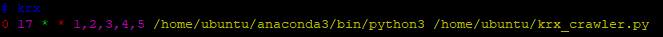

# 3. 확인

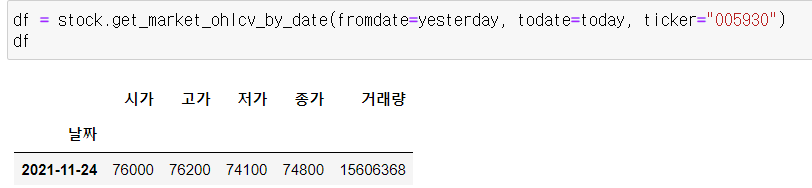

내일 17시에 잘 실행되기를 기도하며!!!!! 마무리!!!!

이렇게 마무리를 하고 다음은 sqlte3를 이용하여 DB에 자동으로 적재하는 법을 해보겠다. 그전 datetime을 크론탭,sqlte3를 활용한 가이드 링크를 남겨두겠다. 참고 하며 블로깅을 만들어 보도록 하겠다. 